# Log-Log Linear Regression

**When using linear regression, when should you log-transform your data?**

Many people seem to think that any non-Gaussian, continuous variables should be transformed so that the data "look more normal." Linear regression does in fact assume the *errors* are normally distributed, but it is fairly robust to violations of this assumption, and there are no such assumptions regarding the predictor variables. What is often ignored or misunderstood is the impact that variable transformations have on the linearity assumption of regression models, and on coefficient interpretation. 

The are a variety of options for transforming data, and simply taking the logarithim may be the most popular, given that your data doesn't include values equal to zero. We will thus focus on linear regression when the outcome and one predictor are both log transformed. 

## Load packages ##

In [1]:
options(warn = -1)

options(repos = c('http://ftp.heanet.ie/mirrors/cran.r-project.org/')) 

install.packages(c("ggplot2", "readr", "dplyr", "tidyr", "viridis", "ggthemes", "ggalt", "car"))

library(ggplot2)
library(readr)
library(dplyr)
library(tidyr)
library(viridis)
library(ggthemes)
library(ggalt)
library(car)

Installing packages into 'C:/Users/ddahly/Documents/R/win-library/3.2'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'ggthemes' successfully unpacked and MD5 sums checked
package 'ggalt' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ddahly\AppData\Local\Temp\RtmpEJP0ZP\downloaded_packages



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Data ##

The data for this exercise are from a small sample of older, in-hospital patients with information on average daily step count (measured over 5 days with a pedometer) and their length of stay in the hospital. The data can be down loaded from github. 

In [2]:
data <- read_csv("https://dantalus.github.io/public/steps.csv")

## Variables ##

The distributions for average daily step count (Steps) and hospital length of stay (LOS) and their repective log transformed values are plotted below. The original values are right skewed and bounded on the left side at zero. As expected, the log transformed values are more symetrical. 

Bandwidth not specified. Using '161.32', via KernSmooth::dpik.
Bandwidth not specified. Using '0.33', via KernSmooth::dpik.
Bandwidth not specified. Using '1.16', via KernSmooth::dpik.
Bandwidth not specified. Using '0.22', via KernSmooth::dpik.


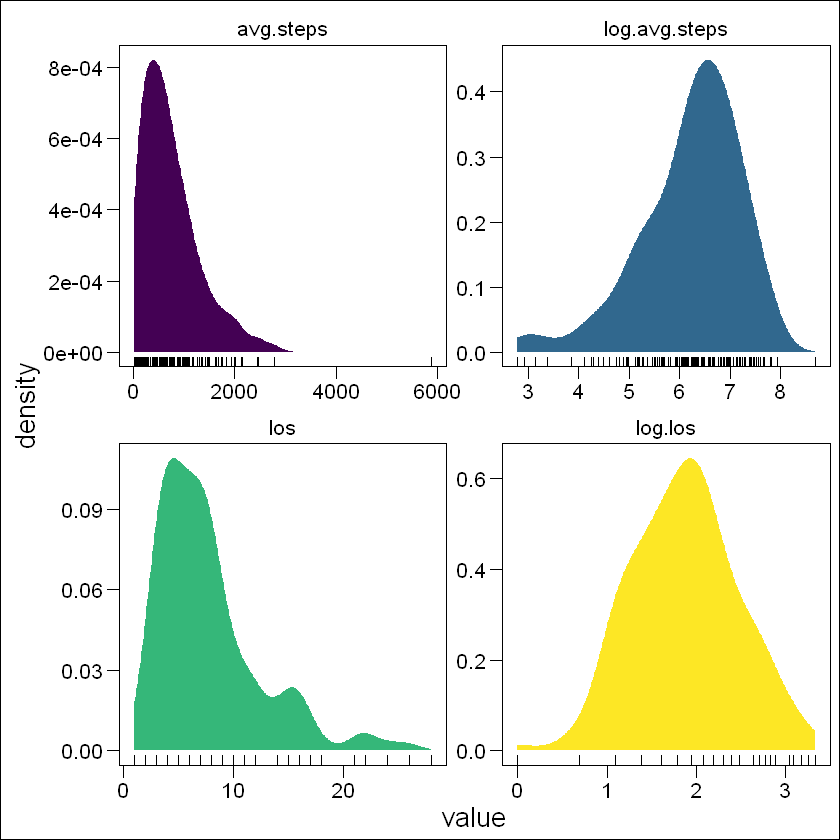

In [3]:
gather(data, variable, value, avg.steps, los,  log.avg.steps, log.los) %>%
mutate(variable = factor(variable, levels = c("avg.steps", 
                                              "log.avg.steps", 
                                              "los", 
                                              "log.los"))) %>%
ggplot(aes(x = value, fill = variable)) +
  geom_bkde() +
  geom_rug() +
  scale_fill_viridis(guide = FALSE, discrete = TRUE) +
  facet_wrap(~variable, scales = "free") +
  theme_base()

## Linearity ##

The real challenge however is that the relationship between Steps and LOS is clearly not linear. This is illustrated in the plot below, where the solid line is from the linear regression of LOS on Steps, and the dashed line is from a loess smoother.  

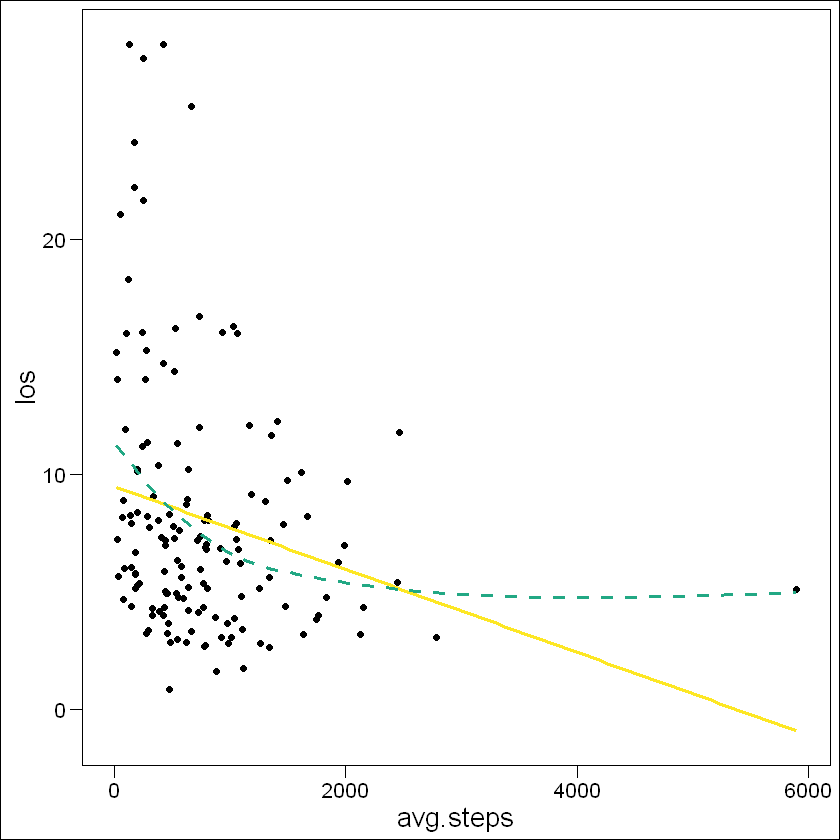

In [4]:
ggplot(data, aes(x = avg.steps, y = los, group)) +
  geom_jitter() +
  geom_smooth(method = "lm", color = viridis(1, begin = 1),   se = FALSE) +
  geom_smooth(span   = 1,    color = viridis(1, begin = 0.6), se = FALSE, linetype = "dashed") +
  theme_base()

## Linear regression ##

We can estimate the linear regression shown in the previous plot as follows:

In [5]:
lr <- lm(los ~ avg.steps, data)

summary(lr)


Call:
lm(formula = los ~ avg.steps, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.632 -3.650 -1.227  1.623 19.275 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.4672380  0.6484016  14.601  < 2e-16 ***
avg.steps   -0.0017605  0.0006241  -2.821  0.00546 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.342 on 146 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.05168,	Adjusted R-squared:  0.04518 
F-statistic: 7.956 on 1 and 146 DF,  p-value: 0.00546


The results tell us that for every 600 step increase in Steps, we would predict a LOS that is a full day shorter (-0.0017 days/step * 600 steps ~= 1 day). However, looking at the diagnostic plots below, clearly various model assumptions are violated, as expected.

## Base R diagnostic plots ##

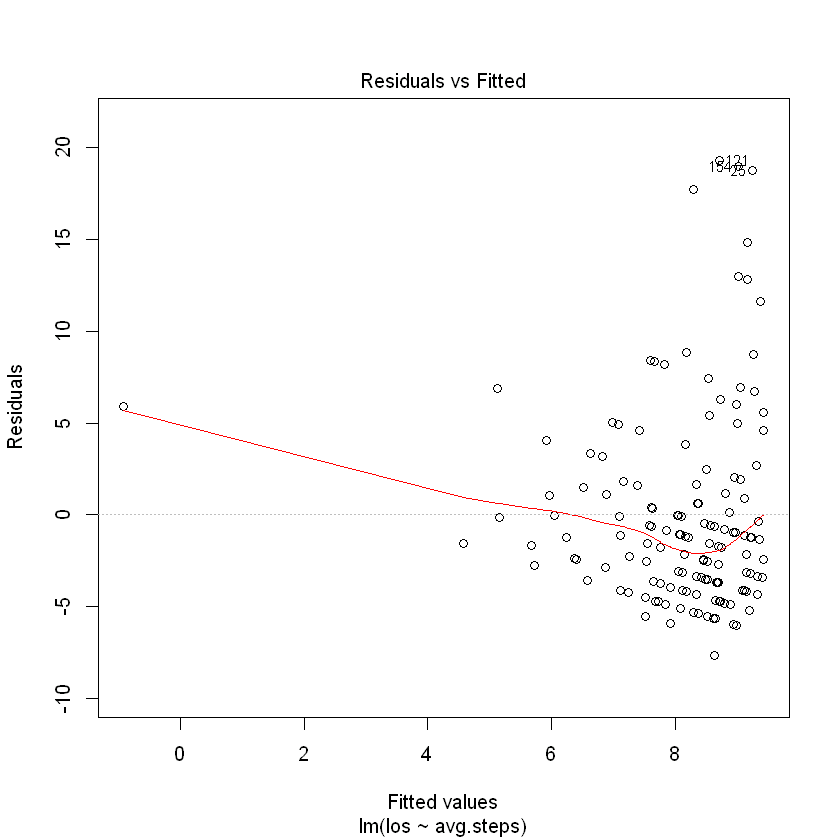

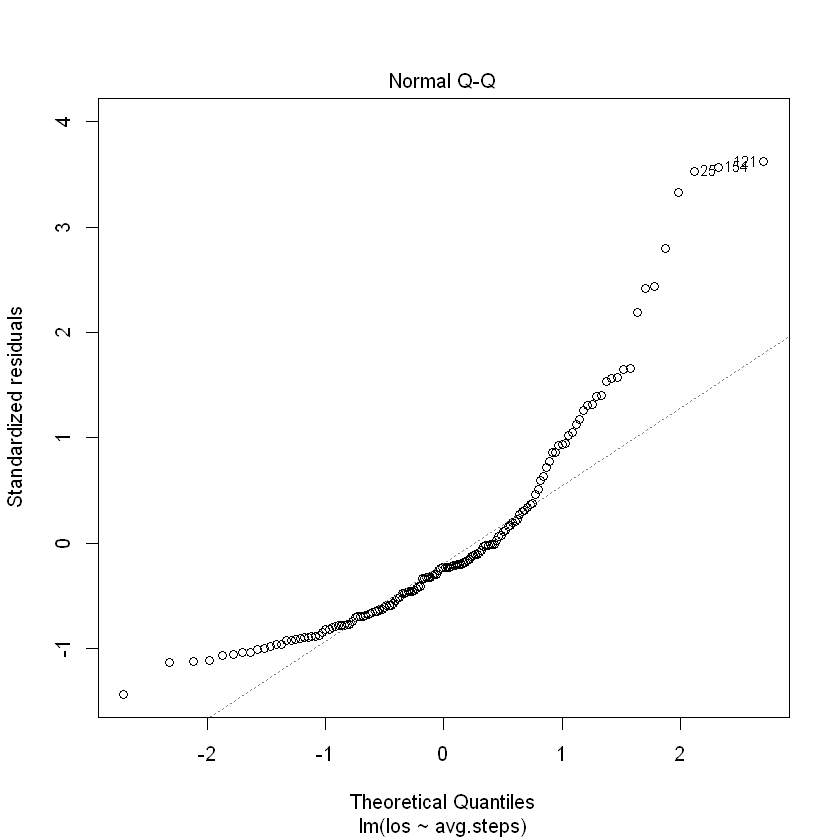

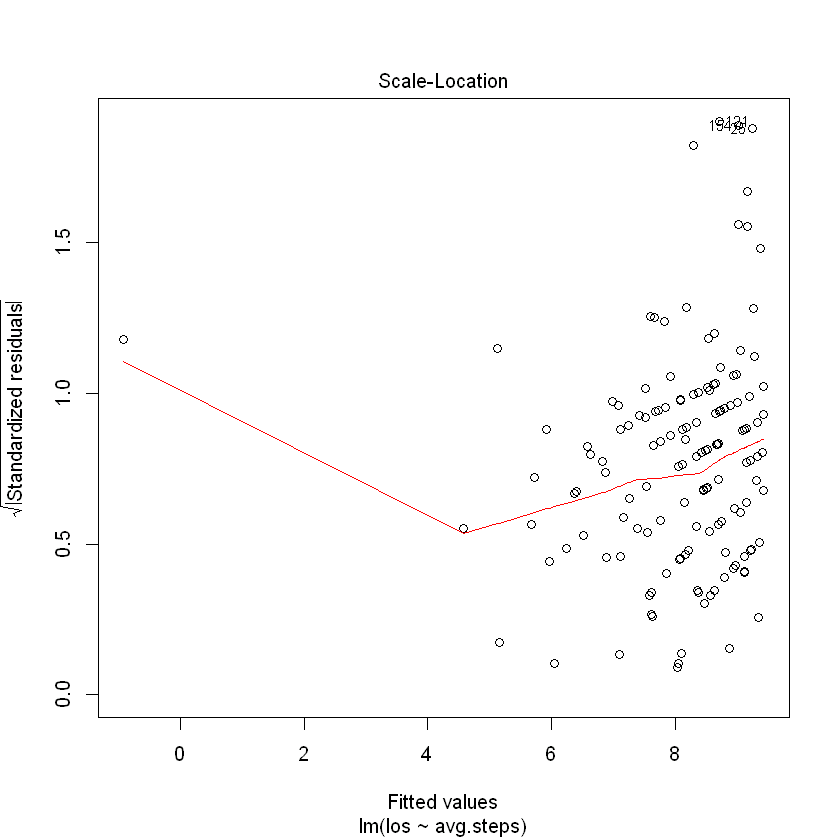

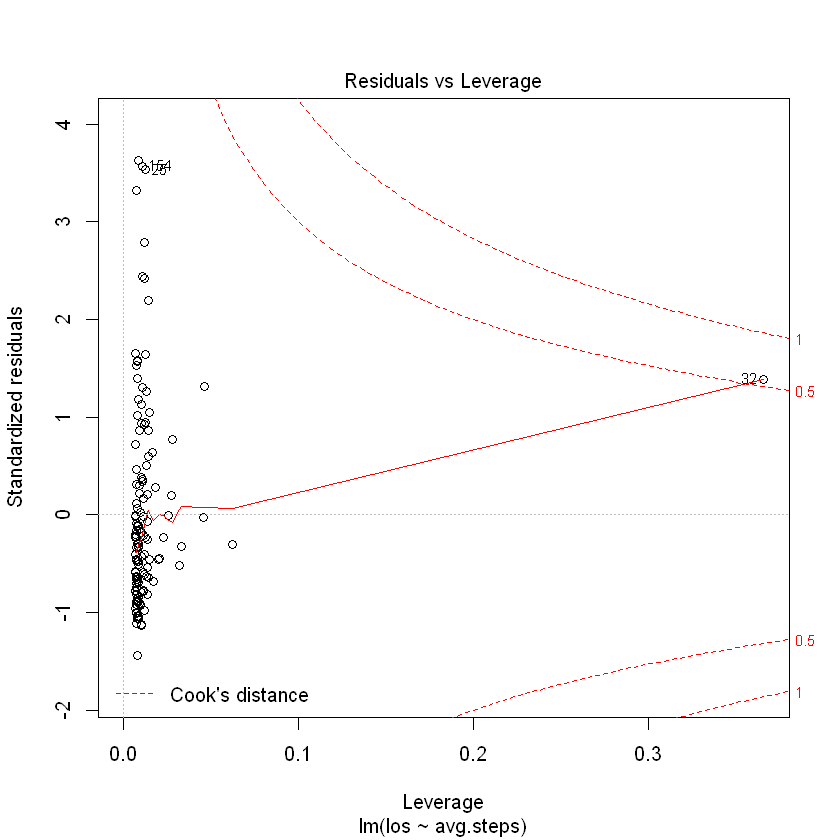

In [12]:
plot(lr)

## Log transformed variables ##

As we saw above, the distributions of Steps and LOS "look more normal" after transformation. More importantly however, the relationship between the log transformed variables is also linear. 

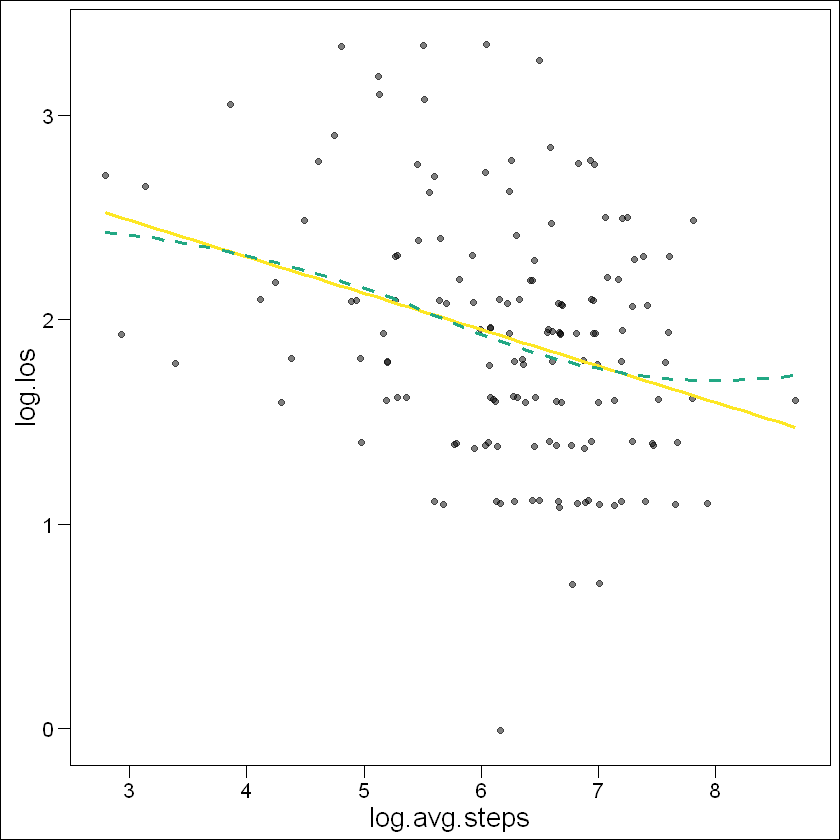

In [6]:
ggplot(data, aes(x = log.avg.steps, y = log.los, group)) +
  geom_jitter(alpha = 0.5) +
  geom_smooth(method = "lm", color = viridis(1, begin = 1),   se = FALSE) +
  geom_smooth(span   = 1,    color = viridis(1, begin = 0.6), se = FALSE, linetype = "dashed") +
  theme_base()

Note that the extreme outlier in the first scatter plot is *not* an outlier in log-log space. 

## Log-Log linear regression ##

A regression model where the outcome and at least one predictor are log transformed is called a **log-log linear model**. Here are the model and results: 

In [7]:
log.log.lr <- lm(log.los ~ log.avg.steps, data)

summary(log.log.lr)



Call:
lm(formula = log.los ~ log.avg.steps, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92304 -0.44851  0.00306  0.32693  1.39440 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.01997    0.29400  10.272  < 2e-16 ***
log.avg.steps -0.17800    0.04653  -3.825 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5748 on 146 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.09109,	Adjusted R-squared:  0.08486 
F-statistic: 14.63 on 1 and 146 DF,  p-value: 0.0001931


## Base R diagnostic plots ##

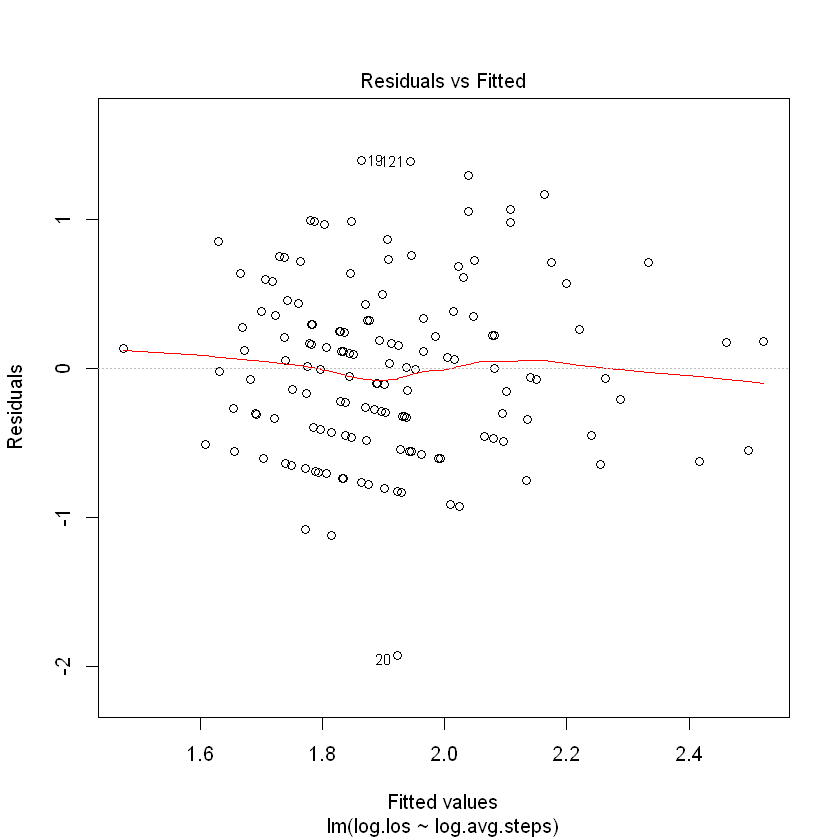

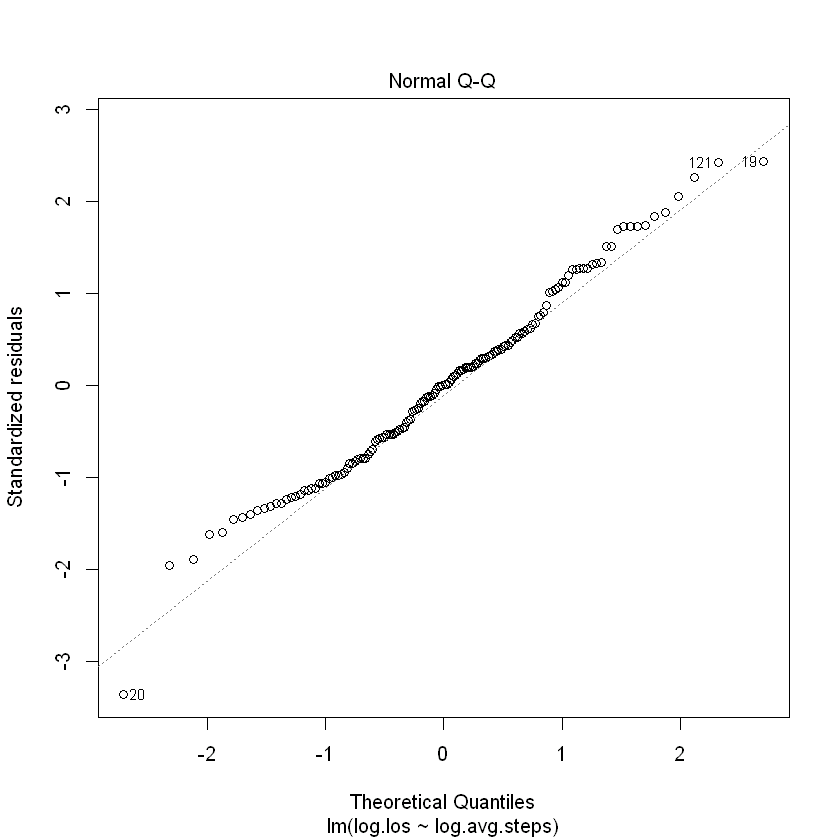

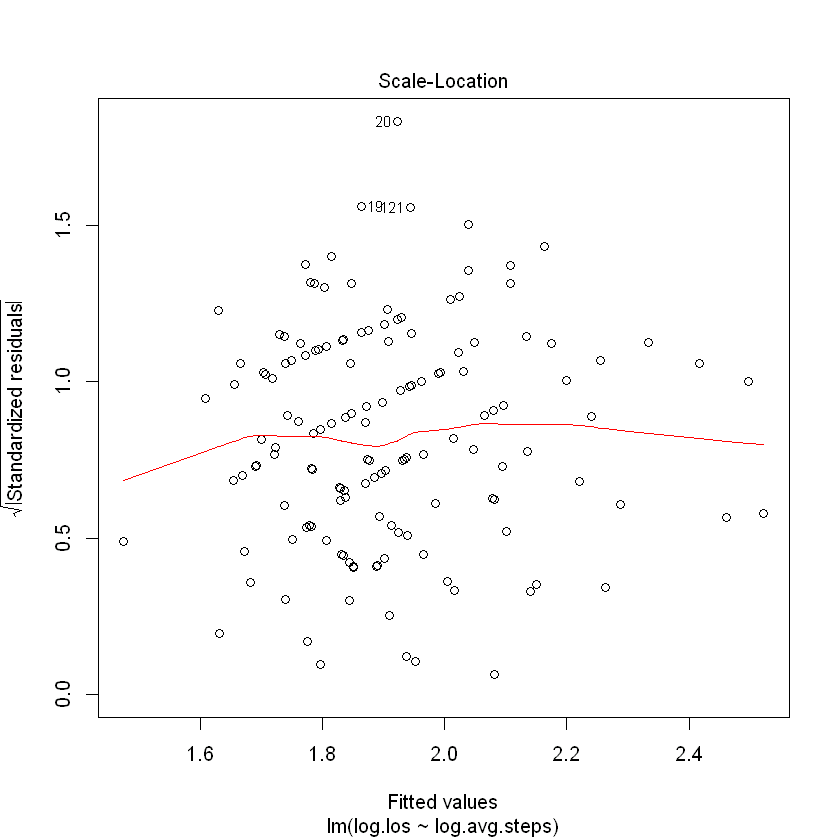

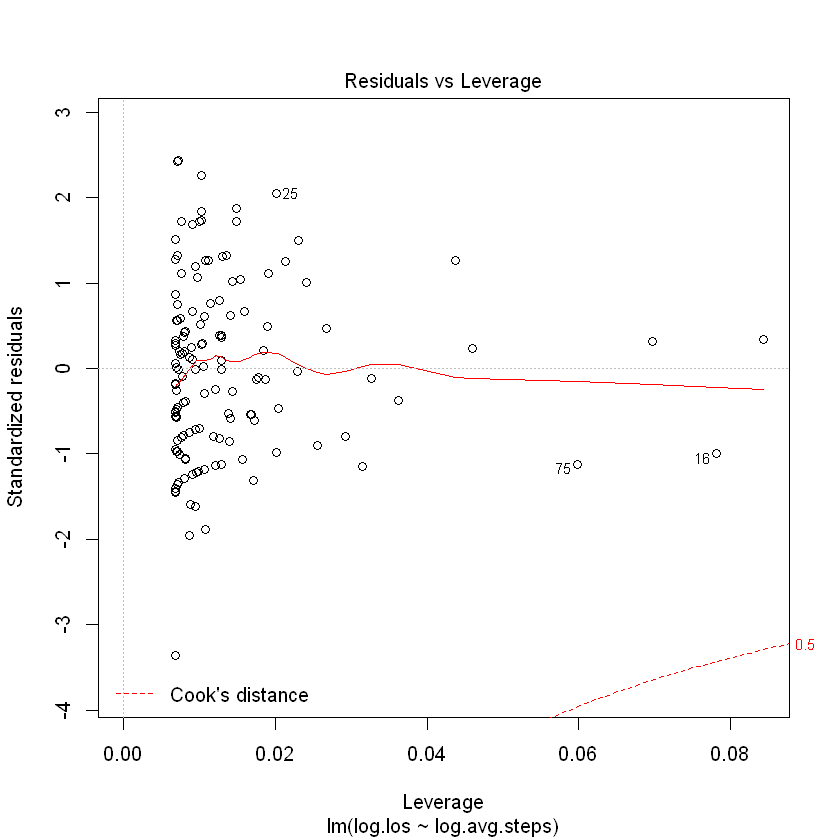

In [8]:
plot(log.log.lr)

## Ploting the results in the original scales ##

We will again scatter plot the Steps and LOS variables with fit lines, but this time we will add the line from the log-log linear regression model we just estimated. Importantly, the regression line in log-log space is straight (see above), but in the space defined by the original scales, it's curved, as shown by the purple line below. 

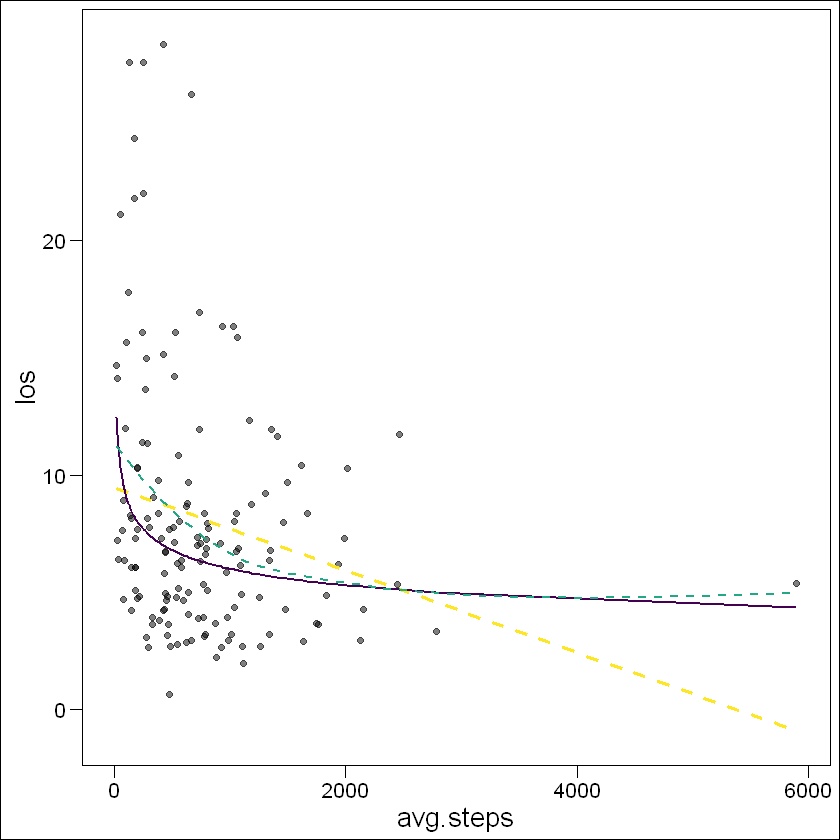

In [18]:
ggplot(data, aes(x = avg.steps, y = los)) +
  geom_jitter(alpha = 0.5) +
  geom_smooth(method = "lm", color = viridis(1, begin = 1), se = FALSE, linetype = "dashed") +
  geom_line(data = data.frame(x = exp(log.log.lr$model$log.avg.steps),
                              y = exp(predict(log.log.lr))),
            aes(x = x, y = y),
            color = viridis(1, end = 0), size = 0.7) +
  geom_smooth(span = 1, color = viridis(1, begin = 0.6), size = 0.7, linetype = "dashed",
              se = FALSE) +
  theme_base()

## Model interpretation ##

So how do we interpret the regression coefficients from a log-log model? The best explanation I have found for interpreting the regression coefficients can be found here: http://www.kenbenoit.net/courses/ME104/logmodels2.pdf

In a nutshell, a 1% increase in the predictor is associated with a Beta% change in the outcome. This is an approximation however. To be exact, we can say that an x% increase in the predictor is associated with a change in the outcome equivalent to multiplying it by 2.71^((log((100+x)/100)) * Beta)). For the model above, the approximation is a 1% increase in Steps is associated with an approximately 0.18% decrease in LOS. Using the exact method, we can calculate the a 50% increase in Steps is associated with a 2.71^((log((100 + 50)/100)) * -0.18)) = 0.93 * LOS = a 7% decrease in LOS.

The important thing to understand is that by working with logarithms, we have moved from talking about absolute differences (e.g. 600 steps = 1 less day in the hospital) to relative differences (given a 1% increase in Steps, we would expect an 0.18% decrease in hospital length of stay). Why is this? Remember from math class that adding log(x) + log(y) = log(x * y)? When we start adding things in log space, we are multiplying them in absolute space. This is the same reason that a one-unit increase in log(odds) space results in an odds-ratio after exponentiation in logistic regression models. This shift from thinking in absolute to thinking in relative terms is important for understanding a number of analytical techniques (e.g. what is the difference between an additive and a multiplicative interaction?). Here is a entertaining introduction to the topic: https://www.youtube.com/watch?v=Pxb5lSPLy9c. 

One last, critical point we must consider is whether the proportional interpretation is reasonable for each variable. In the case of Steps, it makes sense to me that an increase of 50 steps per day would mean something different for a completely sedentary patient vs. a very active patient. How to think about LOS is less obvious to me. Do I expect a change in Steps to be associated with same amount of change in LOS regardless of how long the stay would have been otherwise? Oh dear, I'll have to ask the physiotherapist this one.    

In [ ]:
options(warn = 0)